In [3]:
import numpy as np
hout = np.load("hout_mnist_train.npy", allow_pickle=True)
hout = [np.array(h, dtype=np.float32) for h in hout]

In [8]:
#计数hout[y][:,i]中不在01两端附近的个数
thre = 0.1
s = 0
for i,y in enumerate(range(len(hout))):
    u = np.array([sum((hout[y][:,i]<1-thre) & (hout[y][:,i]>thre)) for i in range(hout[y].shape[1])]) 
    u = u / hout[y].shape[0]
    print('|',i,'|',u.mean(), end='\t|\n')
    s += u.mean()
s/len(hout)
# 说明对于隐藏层的神经元，输出值的分布是集中在两端的

| 0 | 0.017342237132665195	|
| 1 | 0.018469953544133076	|
| 2 | 0.02776649854676013	|
| 3 | 0.023190541896638234	|
| 4 | 0.024994588744588743	|
| 5 | 0.030525174429568168	|
| 6 | 0.023694761986009213	|
| 7 | 0.02347551086603957	|
| 8 | 0.053660888455399895	|
| 9 | 0.04052150164730362	|


0.02836416572491059

In [7]:
#计数out[y][:,i]中分布非极化的个数
thre = 20
for y in range(len(hout)):
    u = np.array([sum(hout[y][:,i]>0.9)/sum(hout[y][:,i]<0.1) for i in range(hout[y].shape[1])])
    print(sum((1./thre<u) * (u<thre)), '/ 32', end='\t')
    print(u[u<1].mean(), '\t', u[u>1].mean())
#说明对于隐藏层的神经元，输出值的分布在两端同样是十分不平衡的

0 / 32	0.013609013555399369 	 170.08301171176086
1 / 32	0.0061900510389442725 	 316.25891272032106
5 / 32	0.027340807912541468 	 68.68013929109154
2 / 32	0.0153127339627648 	 107.86454987937532
2 / 32	0.017238394864972344 	 105.09614680758871
6 / 32	0.021533200926676228 	 66.33819844582786
1 / 32	0.012925941884157114 	 292.71749373482845
5 / 32	0.019597553571491767 	 79.15692274471192
4 / 32	0.03723689788534374 	 44.046954749996516
2 / 32	0.023021065862213915 	 68.45174548600248


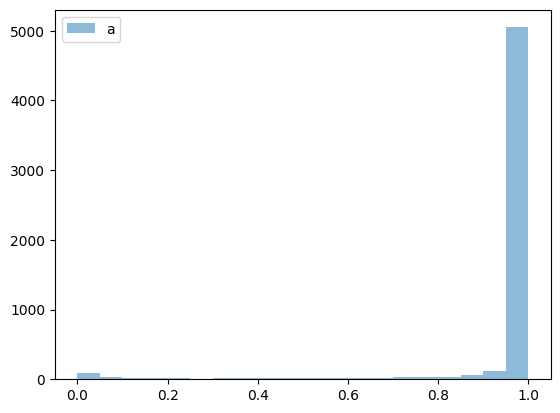

0.0803907718169109

In [33]:
import matplotlib.pyplot as plt
#绘制直方图，展示标签为0的样本的隐藏层输出分布，以第1个神经元为例
plt.hist(hout[8][:,0], bins=20, alpha=0.5, label='a')
plt.legend(loc='upper left')
plt.show()
sum((hout[8][:,0]<0.90)) / sum(hout[0][:,1])
# 图一

In [9]:
# GMM拟合
from sklearn.mixture import GaussianMixture
X = hout[0][:, 1][:, np.newaxis]
clf = GaussianMixture(n_components=3, covariance_type='diag', random_state=1)
clf.fit(X)
clf.means_ #, np.exp(clf.score_samples(np.array([[0.08133394], [0.99998365]])))

array([[0.99998365],
       [0.08133394],
       [0.92459754]])

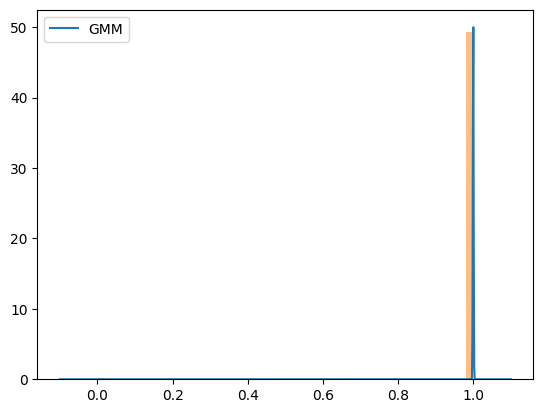

In [10]:
# Plot the data and the GMM model
x = np.linspace(-0.1, 1.1, 1000)
x = x.reshape(-1, 1)
prob = np.exp(clf.score_samples(x))
prob = 50*prob / prob.max()
plt.plot(x, prob, label='GMM')
plt.hist(X, 50, density=True, alpha=0.5)
plt.legend()
plt.show()